In [4]:
from keras.datasets import mnist 
import numpy as np 
import keras
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

In [2]:
(x_train, _), (x_test, _) = mnist.load_data() 

x_train = x_train /255.0
x_test = x_test /255.0
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [5]:
input_img = keras.Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) 
x = MaxPooling2D((2, 2), padding='same')(x) 

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x) 
encoded = MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

2026-02-12 21:29:30.376727: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-12 21:29:30.419858: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2026-02-12 21:29:30.420187: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
# This model maps an input to its reconstruction
autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 8)           0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

In [12]:
%%time
# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=25,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1012 - val_loss: 0.1001
Epoch 2/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1006 - val_loss: 0.0994
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.1002 - val_loss: 0.0986
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0997 - val_loss: 0.0988
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0992 - val_loss: 0.0978
Epoch 6/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0989 - val_loss: 0.0975
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0984 - val_loss: 0.0970
Epoch 8/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0981 - val_loss: 0.0967
Epoch 9/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0977 - val_loss: 0.0962
Epoch 10/25
469/469 [==============================] - 4s 8ms/step - loss: 0.0973 - val_loss: 0.0961

313/313 [==============================] - 1s 2ms/step


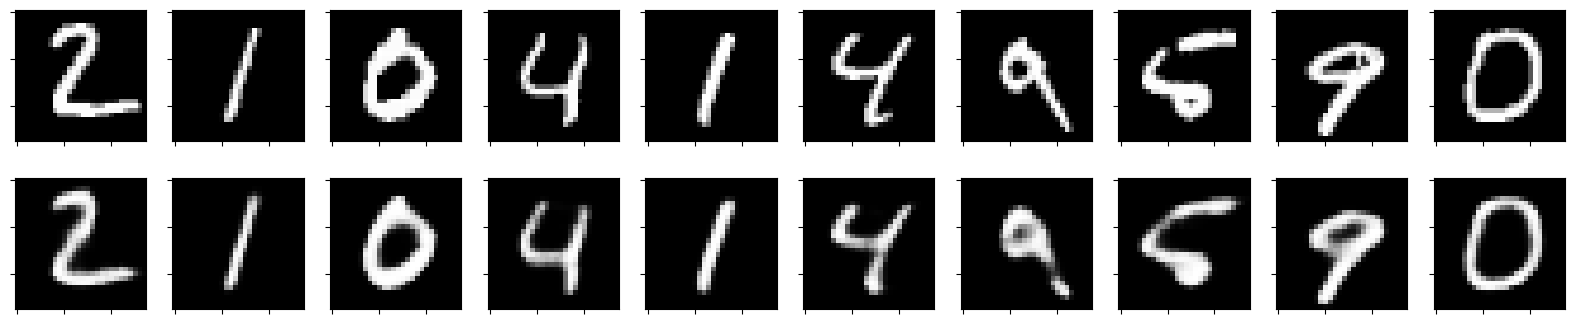

In [ ]:
import matplotlib.pyplot as plt

# Encode and decode some digits
decoded_imgs = autoencoder.predict(x_test)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.tick_params(labelbottom=False)
    ax.tick_params(labelleft=False)
plt.show()

In [ ]:
# Calculate the Compression Ratio
print("Compression: ", (768-128)/768)

Compression:  0.8333333333333334
